# Exploratory Data Analysis

### Exploration and data cleaning

We'll try to understand the data and its main features.

In [1]:
import pandas as pd

total_data = pd.read_csv("../data/raw/diabetes_data.csv")

# Obtain the dimensions of the dataset
print(total_data.shape)
total_data.head()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
# Obtain information about data types and non-null values
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


From here we can deduct that we're dealing with a dataset of 768 rows and 9 columns. There don't seem to be any nulls although from looking at the header we can see some columns with a zero value for skin thickness and for insulin, which shouldn't be possible. Let's search how many of them there are.

In [3]:
print(total_data[total_data['SkinThickness'] == 0].shape)
print(total_data[total_data['Insulin'] == 0].shape)

(227, 9)
(374, 9)


That's roughly 30% of the data for skin thickness and almost 50% for Insulin. This is just too much volume of an already small dataset, so rather than trying to ammend this, let's get rid of those columns altogether to reduce noise.

In [4]:
total_data.drop(['SkinThickness'], axis=1, inplace=True)
total_data.drop(['Insulin'], axis=1, inplace=True)
total_data.head()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,33.6,0.627,50,1
1,1,85,66,26.6,0.351,31,0
2,8,183,64,23.3,0.672,32,1
3,1,89,66,28.1,0.167,21,0
4,0,137,40,43.1,2.288,33,1


Let's do a quick search of duplicates.

In [5]:
total_data.duplicated().sum()

0

Now that our dataset seems to be neat and clean. Let's move on to the next part:

### Analysis of univariate variables
We don't seem to have any categorical variables other than the target so let's jump ahead to the numerical ones.

#### Analysis on numerical variables

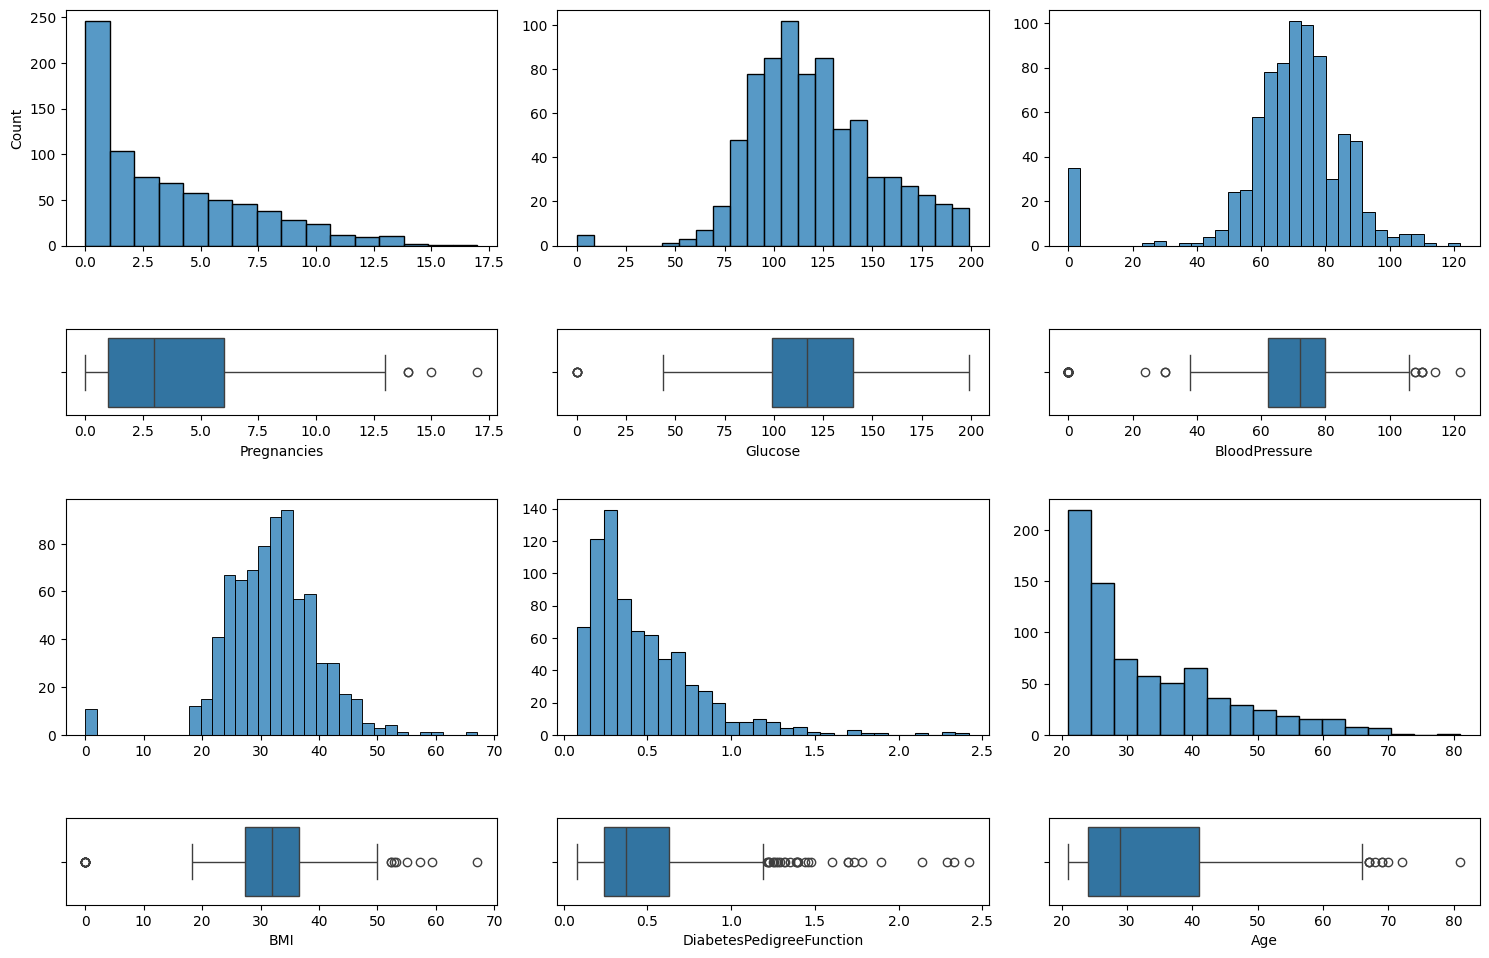

In [6]:
import matplotlib.pyplot as plt 
import seaborn as sns

fig, axs = plt.subplots(4, 3, figsize = (15, 10))

#						Outcome

# Creating a multiple figure with histograms and box plots
sns.histplot(ax = axs[0, 0], data = total_data, x = "Pregnancies").set(xlabel = None)
sns.boxplot(ax = axs[1, 0], data = total_data, x = "Pregnancies").set_box_aspect(0.2)

sns.histplot(ax = axs[0, 1], data = total_data, x = "Glucose").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axs[1, 1], data = total_data, x = "Glucose").set_box_aspect(0.2)

sns.histplot(ax = axs[0, 2], data = total_data, x = "BloodPressure").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axs[1, 2], data = total_data, x = "BloodPressure").set_box_aspect(0.2)

sns.histplot(ax = axs[2, 0], data = total_data, x = "BMI").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axs[3, 0], data = total_data, x = "BMI").set_box_aspect(0.2)

sns.histplot(ax = axs[2, 1], data = total_data, x = "DiabetesPedigreeFunction").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axs[3, 1], data = total_data, x = "DiabetesPedigreeFunction").set_box_aspect(0.2)

sns.histplot(ax = axs[2, 2], data = total_data, x = "Age").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axs[3, 2], data = total_data, x = "Age").set_box_aspect(0.2)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

We can see that the variables Glucose, BloodPressure and BMI have a somewhat normal distribution. However, they also have some outliers valued zero, which shouldn't be possible. They're good candidates for predictors so let's keep this in mind when we do the outlier analysis.

### Analysis of multivariate variables
Now let's see how the variables relate to each other. 

#### Numerical-Numerical
Let's start with the numerical variables.

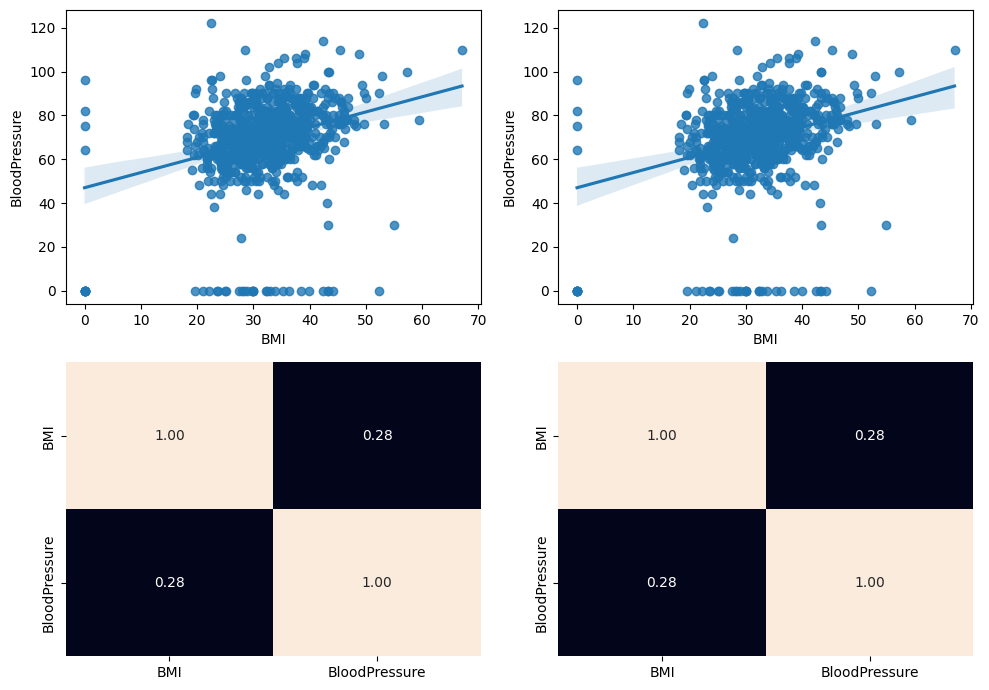

In [7]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7))

# Create a multiple scatter diagram
sns.regplot(ax = axis[0, 0], data = total_data, x = "BMI", y = "BloodPressure")
sns.heatmap(total_data[["BMI", "BloodPressure"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = total_data, x = "BMI", y = "BloodPressure")
sns.heatmap(total_data[["BMI", "BloodPressure"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1], cbar = False)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

As suspected from the previous plots, the BMI and Blood pressure seem to be tightly related although the outliers seem to add some noise to the heatmap.

#### Categorical-numerical
Let's see how numerical variables relate with the target.

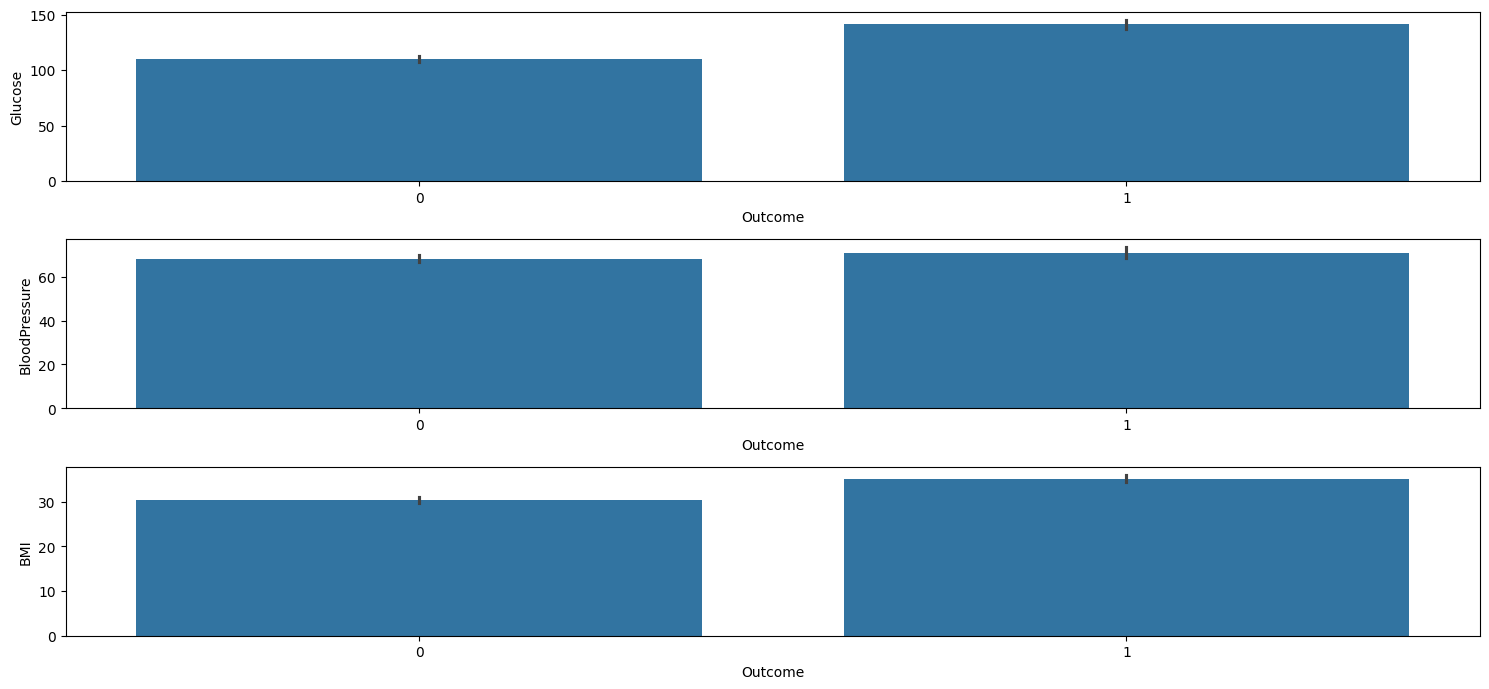

In [8]:
fig, axis = plt.subplots(3, figsize = (15, 7))

sns.barplot(ax = axis[0], data = total_data, x = "Outcome", y = "Glucose")
sns.barplot(ax = axis[1], data = total_data, x = "Outcome", y = "BloodPressure")
sns.barplot(ax = axis[2], data = total_data, x = "Outcome", y = "BMI")

plt.tight_layout()

plt.show()

The barplots for these three variables are worryingly similar. We might be dealing with a colinearity problem. We'll have study this further if the model doesn't perform very well. 

#### Correlation analysis

Let's take a look at how each variable correlates wih each other whenever it makes sense.

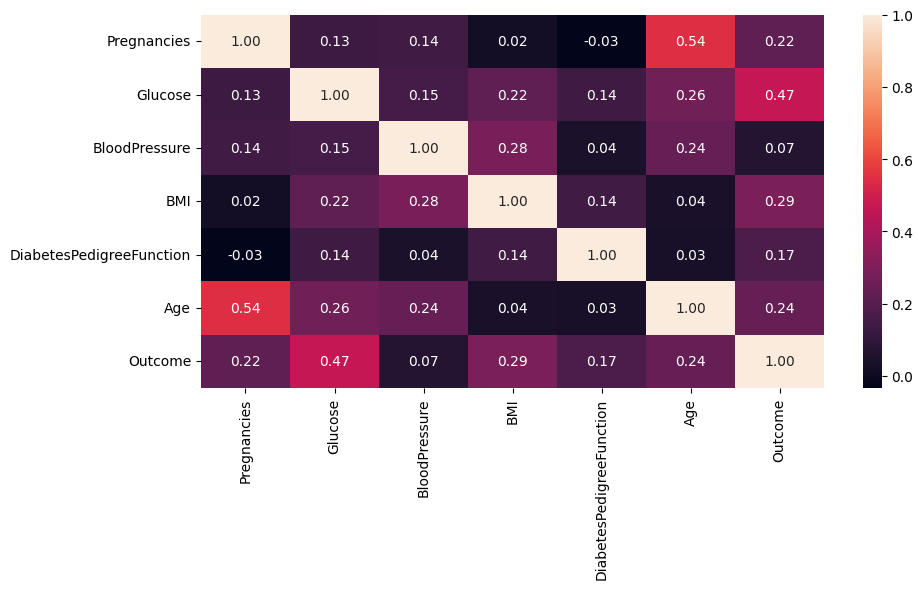

In [9]:
fig, axis = plt.subplots(figsize = (10, 6))

sns.heatmap(total_data.corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

Seems the most relevant features are Age and Glucose, although all of the variablse seem to be somewhat related to the target so we'll leave them as they are. Let's save the data.

In [10]:
total_data.to_csv("../data/interim/diabetes_data.csv", index=False)